In [1]:
import pandas as pd
import nfl_data_py as nfl
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
pbp = pd.concat([nfl.import_pbp_data([season]).assign(season=season) for season in range(2000, 2023)])
pbp.head()

2000 done.
Downcasting floats.
2001 done.
Downcasting floats.
2002 done.
Downcasting floats.
2003 done.
Downcasting floats.
2004 done.
Downcasting floats.
2005 done.
Downcasting floats.
2006 done.
Downcasting floats.
2007 done.
Downcasting floats.
2008 done.
Downcasting floats.
2009 done.
Downcasting floats.
2010 done.
Downcasting floats.
2011 done.
Downcasting floats.
2012 done.
Downcasting floats.
2013 done.
Downcasting floats.
2014 done.
Downcasting floats.
2015 done.
Downcasting floats.
2016 done.
Downcasting floats.
2017 done.
Downcasting floats.
2018 done.
Downcasting floats.
2019 done.
Downcasting floats.
2020 done.
Downcasting floats.
2021 done.
Downcasting floats.
2022 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,34.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pbp.to_csv('2000-2022_pbp.csv', index=False)

In [2]:
pbp = pd.read_csv('2000-2022_pbp.csv')
pbp.head()

C:\Users\17372\AppData\Local\Temp\ipykernel_14736\2820645420.py:1: DtypeWarning: Columns (36,37,45,179,180,182,183,189,190,193,194,197,198,203,204,205,206,207,208,209,210,211,212,213,214,218,219,220,222,224,226,233,234,235,236,237,238,243,244,245,248,249,253,254,255,260,262,263,266,267,268,269,283,284,292,293,294,295,296,299,301,302,303,372,373,374,375,377,379,380,381) have mixed types. Specify dtype option on import or set low_memory=False.
  pbp = pd.read_csv('2000-2022_pbp.csv')


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,34.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,106.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,131.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,148.0,2000_01_ARI_NYG,2000090300,NYG,ARI,REG,1,ARI,away,NYG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
pbp.shape

(1102581, 384)

In [4]:
pbp.columns.tolist()

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

In [3]:
# Compute EPA for rushing and passing for offense and defense for each game
rush_off_epa = pbp.loc[pbp['rush_attempt'] == 1, :].groupby(['posteam', 'season', 'week'], as_index=False)['epa'].mean()
rush_def_epa = pbp.loc[pbp['rush_attempt'] == 1, :].groupby(['defteam', 'season', 'week'], as_index=False)['epa'].mean()
pass_off_epa = pbp.loc[pbp['pass_attempt'] == 1, :].groupby(['posteam', 'season', 'week'], as_index=False)['epa'].mean()
pass_def_epa = pbp.loc[pbp['pass_attempt'] == 1, :].groupby(['defteam', 'season', 'week'], as_index=False)['epa'].mean()
rush_off_epa

,posteam,season,week,epa
0,ARI,2000,1,-0.345669
1,ARI,2000,2,-0.276743
2,ARI,2000,4,-0.334533
3,ARI,2000,5,-0.016838
4,ARI,2000,6,-0.038473
...,...,...,...,...
12315,WAS,2022,13,0.104736
12316,WAS,2022,15,0.190938
12317,WAS,2022,16,-0.490237
12318,WAS,2022,17,-0.106057


In [4]:
# Shift values by one game
rush_off_epa['epa_shifted'] = rush_off_epa.groupby('posteam')['epa'].shift()
pass_off_epa['epa_shifted'] = pass_off_epa.groupby('posteam')['epa'].shift()
rush_def_epa['epa_shifted'] = rush_def_epa.groupby('defteam')['epa'].shift()
pass_def_epa['epa_shifted'] = pass_def_epa.groupby('defteam')['epa'].shift()
rush_off_epa.head()


,posteam,season,week,epa,epa_shifted
0,ARI,2000,1,-0.345669,NaN
1,ARI,2000,2,-0.276743,-0.345669
2,ARI,2000,4,-0.334533,-0.276743
3,ARI,2000,5,-0.016838,-0.334533
4,ARI,2000,6,-0.038473,-0.016838


In [5]:
# Exponentially weighted EPA's
rush_off_epa['ewma'] = rush_off_epa['epa_shifted'].ewm(min_periods=1, span=10).mean()
pass_off_epa['ewma'] = pass_off_epa['epa_shifted'].ewm(min_periods=1, span=10).mean()
rush_def_epa['ewma'] = rush_def_epa['epa_shifted'].ewm(min_periods=1, span=10).mean()
pass_def_epa['ewma'] = pass_def_epa['epa_shifted'].ewm(min_periods=1, span=10).mean()
pass_def_epa

,defteam,season,week,epa,epa_shifted,ewma
0,ARI,2000,1,-0.009200,NaN,NaN
1,ARI,2000,2,0.283460,-0.009200,-0.009200
2,ARI,2000,4,0.500345,0.283460,0.151763
3,ARI,2000,5,0.058499,0.500345,0.291891
4,ARI,2000,6,-0.063633,0.058499,0.214999
...,...,...,...,...,...,...
12315,WAS,2022,13,-0.064683,-0.181549,-0.161337
12316,WAS,2022,15,0.035864,-0.064683,-0.143763
12317,WAS,2022,16,0.269062,0.035864,-0.111104
12318,WAS,2022,17,0.344132,0.269062,-0.041983


In [6]:
# Define dynamically shifting window so that more games are accounted for as the season continues
def dynamic_window(x):
    values = np.zeros(len(x))
    for i, (index, row) in enumerate(x.iterrows()):
        epa = x.epa_shifted[:i+1]
        if row.week > 10:
            values[i] = epa.ewm(min_periods=1, span=row.week).mean().values[-1]
        else:
            values[i] = epa.ewm(min_periods=1, span=10).mean().values[-1]
            
    return pd.Series(values, index=x.index)



In [7]:
# Compute dynamically shifted EPA's
rush_off_epa['ewma_dynamic'] = rush_off_epa.groupby('posteam').apply(dynamic_window).values
pass_off_epa['ewma_dynamic'] = pass_off_epa.groupby('posteam').apply(dynamic_window).values
rush_def_epa['ewma_dynamic'] = rush_def_epa.groupby('defteam').apply(dynamic_window).values
pass_def_epa['ewma_dynamic'] = pass_def_epa.groupby('defteam').apply(dynamic_window).values
rush_off_epa

,posteam,season,week,epa,epa_shifted,ewma,ewma_dynamic
0,ARI,2000,1,-0.345669,NaN,NaN,NaN
1,ARI,2000,2,-0.276743,-0.345669,-0.345669,-0.345669
2,ARI,2000,4,-0.334533,-0.276743,-0.307759,-0.307759
3,ARI,2000,5,-0.016838,-0.334533,-0.318522,-0.318522
4,ARI,2000,6,-0.038473,-0.016838,-0.219131,-0.219131
...,...,...,...,...,...,...,...
12315,WAS,2022,13,0.104736,0.132911,-0.015815,-0.020420
12316,WAS,2022,15,0.190938,0.104736,0.006103,-0.006425
12317,WAS,2022,16,-0.490237,0.190938,0.039710,0.015395
12318,WAS,2022,17,-0.106057,-0.490237,-0.056644,-0.043055


In [8]:
# Combine EPA into offense and defense
off_epa = rush_off_epa.merge(pass_off_epa, on=['posteam', 'season', 'week'], suffixes=['_rush', '_pass']).rename(columns={'posteam': 'team'})
def_epa = rush_def_epa.merge(pass_def_epa, on=['defteam', 'season', 'week'], suffixes=['_rush', '_pass']).rename(columns={'defteam': 'team'})
off_epa

,team,season,week,epa_rush,epa_shifted_rush,ewma_rush,ewma_dynamic_rush,epa_pass,epa_shifted_pass,ewma_pass,ewma_dynamic_pass
0,ARI,2000,1,-0.345669,NaN,NaN,NaN,0.019830,NaN,NaN,NaN
1,ARI,2000,2,-0.276743,-0.345669,-0.345669,-0.345669,0.558977,0.019830,0.019830,0.019830
2,ARI,2000,4,-0.334533,-0.276743,-0.307759,-0.307759,-0.264054,0.558977,0.316361,0.316361
3,ARI,2000,5,-0.016838,-0.334533,-0.318522,-0.318522,0.049141,-0.264054,0.083038,0.083038
4,ARI,2000,6,-0.038473,-0.016838,-0.219131,-0.219131,0.101830,0.049141,0.071871,0.071871
...,...,...,...,...,...,...,...,...,...,...,...
12315,WAS,2022,13,0.104736,0.132911,-0.015815,-0.020420,-0.006667,0.102887,-0.054467,-0.069415
12316,WAS,2022,15,0.190938,0.104736,0.006103,-0.006425,-0.328804,-0.006667,-0.045776,-0.066864
12317,WAS,2022,16,-0.490237,0.190938,0.039710,0.015395,0.183474,-0.328804,-0.097236,-0.099905
12318,WAS,2022,17,-0.106057,-0.490237,-0.056644,-0.043055,-0.261073,0.183474,-0.046198,-0.068626


In [9]:
# Combine all into one table
epa = off_epa.merge(def_epa, on=['team', 'season', 'week'], suffixes=['_off', '_def'])
epa.head()

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def
0,ARI,2000,1,-0.345669,NaN,NaN,NaN,0.019830,NaN,NaN,NaN,0.166199,NaN,NaN,NaN,-0.009200,NaN,NaN,NaN
1,ARI,2000,2,-0.276743,-0.345669,-0.345669,-0.345669,0.558977,0.019830,0.019830,0.019830,-0.065981,0.166199,0.166199,0.166199,0.283460,-0.009200,-0.009200,-0.009200
2,ARI,2000,4,-0.334533,-0.276743,-0.307759,-0.307759,-0.264054,0.558977,0.316361,0.316361,-0.018524,-0.065981,0.038500,0.038500,0.500345,0.283460,0.151763,0.151763
3,ARI,2000,5,-0.016838,-0.334533,-0.318522,-0.318522,0.049141,-0.264054,0.083038,0.083038,0.004625,-0.018524,0.015577,0.015577,0.058499,0.500345,0.291891,0.291891
4,ARI,2000,6,-0.038473,-0.016838,-0.219131,-0.219131,0.101830,0.049141,0.071871,0.071871,0.086308,0.004625,0.011969,0.011969,-0.063633,0.058499,0.214999,0.214999


In [10]:
# Compute average EPA by week
means = epa.groupby(['season', 'week'], as_index=False)[[column for column in epa.columns if 'dynamic' in column]].mean()
means['avg_epa'] = means[[column for column in epa.columns if 'dynamic' in column]].mean(axis=1)
means = means[['season', 'week', 'avg_epa']]
means

,season,week,avg_epa
0,2000,1,NaN
1,2000,2,-0.081150
2,2000,3,-0.039475
3,2000,4,-0.048194
4,2000,5,-0.046981
...,...,...,...
480,2022,18,-0.024758
481,2022,19,-0.021530
482,2022,20,0.000921
483,2022,21,0.016842


In [11]:
epa = epa.merge(means, on = ['season', 'week'])
epa

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
0,ARI,2000,1,-0.345669,NaN,NaN,NaN,0.019830,NaN,NaN,NaN,0.166199,NaN,NaN,NaN,-0.009200,NaN,NaN,NaN,NaN
1,ATL,2000,1,-0.363727,NaN,-0.057088,NaN,0.329638,NaN,-0.144404,NaN,-0.041899,NaN,-0.062043,NaN,0.125751,NaN,-0.000241,NaN,NaN
2,BAL,2000,1,-0.022581,NaN,-0.012601,NaN,0.087666,NaN,-0.095175,NaN,-0.499352,NaN,-0.039190,NaN,-0.216112,NaN,0.149598,NaN,NaN
3,BUF,2000,1,-0.288235,NaN,-0.005305,NaN,-0.135394,NaN,-0.112105,NaN,-0.241708,NaN,-0.131862,NaN,-0.387886,NaN,-0.008201,NaN,NaN
4,CAR,2000,1,-0.017835,NaN,0.027041,NaN,-0.100068,NaN,0.049925,NaN,-0.006129,NaN,-0.137631,NaN,0.147979,NaN,-0.073238,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12315,SEA,2014,21,0.088337,0.157183,0.010415,0.011998,0.226393,-0.166031,0.097471,0.102665,-0.231904,-0.106377,-0.182744,-0.183931,0.334324,-0.273597,-0.234510,-0.183773,-0.024550
12316,NE,2017,21,0.058719,-0.266479,-0.045873,-0.049933,0.379339,0.115744,0.164189,0.198810,0.196937,-0.093841,-0.058792,-0.045496,0.499032,0.195600,0.018059,0.005570,-0.014195
12317,PHI,2017,21,0.196937,-0.062614,-0.120549,-0.097057,0.499032,0.702384,0.158496,0.127611,0.058719,-0.058109,-0.137192,-0.127519,0.379339,-0.220417,-0.159710,-0.125550,-0.014195
12318,PIT,2005,21,0.110020,-0.123824,-0.049172,-0.057548,-0.054930,0.752312,0.344600,0.241242,0.164945,0.226269,-0.038966,-0.074808,-0.082010,-0.328769,-0.091204,-0.072983,0.006444


In [12]:
epa = epa.loc[epa['season'] != epa['season'].unique()[0], :]
epa = epa.reset_index(drop=True)
epa.head()

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,ewma_dynamic_pass_off,epa_rush_def,epa_shifted_rush_def,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa
0,ARI,2001,2,-0.228353,-0.048532,-0.224168,-0.224168,0.108686,-0.715064,-0.231613,-0.231613,0.001074,0.024131,0.042308,0.042308,0.419153,-0.196194,0.085527,0.085527,-0.080437
1,ATL,2001,2,-0.130927,0.103782,-0.098124,-0.099270,0.919700,-0.228843,-0.262468,-0.265764,0.068162,-0.130169,-0.066936,-0.067072,0.252806,0.142591,0.072222,0.074245,-0.080437
2,BAL,2001,2,-0.362641,-0.647642,-0.235185,-0.237918,-0.276097,0.493910,-0.006824,-0.005739,-0.127129,-0.331880,-0.318296,-0.321723,-0.106041,-0.188780,-0.348032,-0.354143,-0.080437
3,BUF,2001,2,0.088352,-0.138749,-0.086644,-0.089441,0.105837,-0.512002,-0.027250,-0.024333,0.108893,-0.189240,-0.083526,-0.081864,0.461351,0.227580,-0.016756,-0.017050,-0.080437
4,CAR,2001,2,0.068162,-0.224760,-0.208046,-0.214609,0.252806,0.102058,-0.094943,-0.098987,-0.130927,-0.027202,-0.047977,-0.045474,0.919700,-0.276173,0.043286,0.046539,-0.080437


In [13]:
# Perform same operations for Completion Percentage over Expected
cpoe = pbp.loc[pbp['cpoe'].notna() != 0, :].groupby(['posteam', 'season', 'week'], as_index=False)['cpoe'].mean()
cpoe['cpoe_shifted'] = cpoe['cpoe'].shift()
cpoe['cpoe_ewma'] = cpoe['cpoe_shifted'].ewm(min_periods=1, span=10).mean()
#cpoe['cpoe_dynamic'] = cpoe.apply(dynamic_window).values
cpoe = cpoe.rename(columns={'posteam': 'team'})
cpoe = cpoe.loc[cpoe['season'] != cpoe['season'].unique()[0], :]
cpoe


,team,season,week,cpoe,cpoe_shifted,cpoe_ewma
16,ARI,2007,1,-8.874742,8.460219,0.332922
17,ARI,2007,2,-2.138226,-8.874742,-1.398321
18,ARI,2007,3,-0.569264,-2.138226,-1.536582
19,ARI,2007,4,0.772025,-0.569264,-1.356733
20,ARI,2007,5,-2.135196,0.772025,-0.962563
...,...,...,...,...,...,...
9136,WAS,2022,13,2.712633,-2.758467,-1.707028
9137,WAS,2022,15,2.931862,2.712633,-0.903453
9138,WAS,2022,16,11.524713,2.931862,-0.206123
9139,WAS,2022,17,-9.525131,11.524713,1.926756


In [14]:
stats = epa.merge(cpoe, on=['team', 'season', 'week'])
stats.head()

,team,season,week,epa_rush_off,epa_shifted_rush_off,ewma_rush_off,ewma_dynamic_rush_off,epa_pass_off,epa_shifted_pass_off,ewma_pass_off,...,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa,cpoe,cpoe_shifted,cpoe_ewma
0,ARI,2007,1,0.003113,0.147861,-0.109254,-0.109254,-0.190050,0.336044,0.141675,...,-0.106950,-0.106950,-0.390013,0.171905,0.065000,0.065000,-0.058033,-8.874742,8.460219,0.332922
1,ATL,2007,1,-0.175738,0.031541,0.004026,0.004026,-0.344415,-0.075764,-0.142943,...,-0.143898,-0.143898,-0.047147,0.386805,0.062689,0.062689,-0.058033,4.906935,12.682046,-0.898811
2,BAL,2007,1,-0.082755,-0.060152,-0.143007,-0.143007,-0.601612,-0.495659,0.023694,...,-0.283763,-0.283763,-0.056768,-0.075951,-0.190523,-0.190523,-0.058033,2.064439,1.776666,3.039281
3,BUF,2007,1,0.125044,-0.525187,-0.194925,-0.194925,-0.335252,-0.259049,0.017588,...,-0.008180,-0.008180,0.203427,0.052781,-0.072638,-0.072638,-0.058033,3.864188,-1.600507,3.491611
4,CAR,2007,1,-0.032480,-0.141015,-0.122062,-0.122062,0.342685,0.432605,-0.080809,...,-0.059617,-0.059617,-0.174467,-0.252001,-0.051434,-0.051434,-0.058033,2.567355,18.041569,3.182093


In [72]:
# Create table of game results
games = pbp[['season', 'week', 'home_team', 'away_team', 'home_score', 'away_score']].drop_duplicates().reset_index(drop=True)
games['pnt_diff'] = games['home_score'] - games['away_score']
games['over_under'] = games['home_score'] + games['away_score']
games.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff
0,2000,1,NYG,ARI,21,16,5
1,2000,1,PIT,BAL,0,16,-16
2,2000,1,WAS,CAR,20,17,3
3,2000,1,MIN,CHI,30,27,3
4,2000,1,LA,DEN,41,36,5


In [73]:
games['pnt_diff_shifted'] = games['pnt_diff'].shift()
games.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff,pnt_diff_shifted
0,2000,1,NYG,ARI,21,16,5,NaN
1,2000,1,PIT,BAL,0,16,-16,5.0
2,2000,1,WAS,CAR,20,17,3,-16.0
3,2000,1,MIN,CHI,30,27,3,3.0
4,2000,1,LA,DEN,41,36,5,3.0


In [74]:
games['exp_diff'] = games['pnt_diff_shifted'].ewm(min_periods=1, span=10).mean()
games

,season,week,home_team,away_team,home_score,away_score,pnt_diff,pnt_diff_shifted,exp_diff
0,2000,1,NYG,ARI,21,16,5,NaN,NaN
1,2000,1,PIT,BAL,0,16,-16,5.0,5.000000
2,2000,1,WAS,CAR,20,17,3,-16.0,-6.550000
3,2000,1,MIN,CHI,30,27,3,3.0,-2.710963
4,2000,1,LA,DEN,41,36,5,3.0,-0.829455
...,...,...,...,...,...,...,...,...,...
6155,2022,20,KC,JAX,27,20,7,7.0,0.809207
6156,2022,20,PHI,NYG,38,7,31,7.0,1.934806
6157,2022,21,KC,CIN,23,20,3,31.0,7.219386
6158,2022,21,PHI,SF,31,7,24,3.0,6.452225


In [75]:
games['home_team_win'] = np.where(games['home_score'] > games['away_score'], 1, 0)
games.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff,pnt_diff_shifted,exp_diff,home_team_win
0,2000,1,NYG,ARI,21,16,5,NaN,NaN,1
1,2000,1,PIT,BAL,0,16,-16,5.0,5.000000,0
2,2000,1,WAS,CAR,20,17,3,-16.0,-6.550000,1
3,2000,1,MIN,CHI,30,27,3,3.0,-2.710963,1
4,2000,1,LA,DEN,41,36,5,3.0,-0.829455,1


In [110]:
home = games.merge(stats.rename(columns={'team': 'home_team'}), on=['season', 'week', 'home_team'])
away = games.merge(stats.rename(columns={'team': 'away_team'}), on=['season', 'week', 'away_team'])
home.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff,pnt_diff_shifted,exp_diff,home_team_win,...,ewma_rush_def,ewma_dynamic_rush_def,epa_pass_def,epa_shifted_pass_def,ewma_pass_def,ewma_dynamic_pass_def,avg_epa,cpoe,cpoe_shifted,cpoe_ewma
0,2007,1,SF,ARI,20,17,3,-12.0,2.671093,1,...,-0.093209,-0.093209,-0.190050,-0.276868,0.070019,0.070019,-0.058033,-17.104226,-6.563141,-2.132208
1,2007,1,MIN,ATL,24,3,21,3.0,2.730894,1,...,-0.357084,-0.357084,-0.344415,0.497637,-0.040333,-0.040333,-0.058033,-1.435623,-7.247092,-3.017967
2,2007,1,CIN,BAL,27,20,7,21.0,6.052550,1,...,-0.145143,-0.145143,-0.601612,0.412244,0.152045,0.152045,-0.058033,3.189457,1.707688,4.194972
3,2007,1,LA,CAR,13,27,-14,7.0,6.224813,0,...,-0.005445,-0.005445,0.342685,-0.327976,-0.003297,-0.003297,-0.058033,-11.855589,1.091246,1.039128
4,2007,1,LAC,CHI,14,3,11,-14.0,2.547575,1,...,-0.017041,-0.017041,-0.167608,0.003963,-0.054027,-0.054027,-0.058033,9.261758,-12.604444,-3.721369


In [111]:
final = home.merge(away, on=['season', 'week', 'home_team', 'away_team', 'home_score', 'away_score', 'home_team_win', 'pnt_diff', 'pnt_diff_shifted', 'exp_diff'], suffixes=('_home', '_away'))
final.head()

,season,week,home_team,away_team,home_score,away_score,pnt_diff,pnt_diff_shifted,exp_diff,home_team_win,...,ewma_rush_def_away,ewma_dynamic_rush_def_away,epa_pass_def_away,epa_shifted_pass_def_away,ewma_pass_def_away,ewma_dynamic_pass_def_away,avg_epa_away,cpoe_away,cpoe_shifted_away,cpoe_ewma_away
0,2007,1,SF,ARI,20,17,3,-12.0,2.671093,1,...,-0.106950,-0.106950,-0.390013,0.171905,0.065000,0.065000,-0.058033,-8.874742,8.460219,0.332922
1,2007,1,MIN,ATL,24,3,21,3.0,2.730894,1,...,-0.143898,-0.143898,-0.047147,0.386805,0.062689,0.062689,-0.058033,4.906935,12.682046,-0.898811
2,2007,1,CIN,BAL,27,20,7,21.0,6.052550,1,...,-0.283763,-0.283763,-0.056768,-0.075951,-0.190523,-0.190523,-0.058033,2.064439,1.776666,3.039281
3,2007,1,LA,CAR,13,27,-14,7.0,6.224813,0,...,-0.059617,-0.059617,-0.174467,-0.252001,-0.051434,-0.051434,-0.058033,2.567355,18.041569,3.182093
4,2007,1,LAC,CHI,14,3,11,-14.0,2.547575,1,...,-0.106526,-0.106526,0.012665,0.101125,-0.059140,-0.059140,-0.058033,-10.482767,7.928480,-6.215191


In [112]:
final['adj_rush_off_home'] = final['ewma_dynamic_rush_off_home'] + (final['avg_epa_home'] - final['ewma_dynamic_rush_def_away'])
final['adj_pass_off_home'] = final['ewma_dynamic_pass_off_home'] + (final['avg_epa_home'] - final['ewma_dynamic_pass_def_away'])
final['adj_rush_def_home'] = final['ewma_dynamic_rush_def_home'] + (final['avg_epa_home'] - final['ewma_dynamic_rush_off_away'])
final['adj_pass_def_home'] = final['ewma_dynamic_pass_def_home'] + (final['avg_epa_home'] - final['ewma_dynamic_pass_off_away'])
final['adj_rush_off_away'] = final['ewma_dynamic_rush_off_away'] + (final['avg_epa_away'] - final['ewma_dynamic_rush_def_home'])
final['adj_pass_off_away'] = final['ewma_dynamic_pass_off_away'] + (final['avg_epa_away'] - final['ewma_dynamic_pass_def_home'])
final['adj_rush_def_away'] = final['ewma_dynamic_rush_def_away'] + (final['avg_epa_away'] - final['ewma_dynamic_rush_off_home'])
final['adj_pass_def_away'] = final['ewma_dynamic_pass_def_away'] + (final['avg_epa_away'] - final['ewma_dynamic_pass_off_home'])

final

,season,week,home_team,away_team,home_score,away_score,pnt_diff,pnt_diff_shifted,exp_diff,home_team_win,...,cpoe_shifted_away,cpoe_ewma_away,adj_rush_off_home,adj_pass_off_home,adj_rush_def_home,adj_pass_def_home,adj_rush_off_away,adj_pass_off_away,adj_rush_def_away,adj_pass_def_away
0,2007,1,SF,ARI,20,17,3,-12.0,2.671093,1,...,8.460219,0.332922,0.041032,-0.279309,-0.041989,-0.129690,-0.074078,0.013623,-0.157098,0.163242
1,2007,1,MIN,ATL,24,3,21,3.0,2.730894,1,...,12.682046,-0.898811,0.007499,-0.411538,-0.419144,0.044576,0.303077,-0.160643,-0.123566,0.295471
2,2007,1,CIN,BAL,27,20,7,21.0,6.052550,1,...,1.776666,3.039281,0.109909,0.261222,-0.060169,0.070318,-0.055897,-0.186385,-0.225976,-0.377289
3,2007,1,LA,CAR,13,27,-14,7.0,6.224813,0,...,18.041569,3.182093,-0.010533,0.113719,0.058584,0.019478,-0.174650,-0.135545,-0.105534,-0.229786
4,2007,1,LAC,CHI,14,3,11,-14.0,2.547575,1,...,7.928480,-6.215191,0.181784,0.004144,0.001851,0.151748,-0.117918,-0.267815,-0.297851,-0.120210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,2022,20,KC,JAX,27,20,7,7.0,0.809207,1,...,-6.799883,0.571843,0.127321,0.194123,0.067244,-0.096317,-0.065402,0.098159,-0.125479,-0.192280
4305,2022,20,PHI,NYG,38,7,31,7.0,1.934806,1,...,-1.306613,1.286958,-0.002838,0.021696,-0.063047,-0.063611,0.064889,0.065453,0.004680,-0.019854
4306,2022,21,KC,CIN,23,20,3,31.0,7.219386,1,...,5.609644,2.894719,0.115123,0.261574,0.081152,-0.170026,-0.047469,0.203709,-0.081440,-0.227891
4307,2022,21,PHI,SF,31,7,24,3.0,6.452225,1,...,4.741752,1.745968,0.209641,0.147706,0.092214,-0.333219,-0.058531,0.366902,-0.175958,-0.114022


In [113]:
final.columns.tolist()

['season',
 'week',
 'home_team',
 'away_team',
 'home_score',
 'away_score',
 'pnt_diff',
 'pnt_diff_shifted',
 'exp_diff',
 'home_team_win',
 'epa_rush_off_home',
 'epa_shifted_rush_off_home',
 'ewma_rush_off_home',
 'ewma_dynamic_rush_off_home',
 'epa_pass_off_home',
 'epa_shifted_pass_off_home',
 'ewma_pass_off_home',
 'ewma_dynamic_pass_off_home',
 'epa_rush_def_home',
 'epa_shifted_rush_def_home',
 'ewma_rush_def_home',
 'ewma_dynamic_rush_def_home',
 'epa_pass_def_home',
 'epa_shifted_pass_def_home',
 'ewma_pass_def_home',
 'ewma_dynamic_pass_def_home',
 'avg_epa_home',
 'cpoe_home',
 'cpoe_shifted_home',
 'cpoe_ewma_home',
 'epa_rush_off_away',
 'epa_shifted_rush_off_away',
 'ewma_rush_off_away',
 'ewma_dynamic_rush_off_away',
 'epa_pass_off_away',
 'epa_shifted_pass_off_away',
 'ewma_pass_off_away',
 'ewma_dynamic_pass_off_away',
 'epa_rush_def_away',
 'epa_shifted_rush_def_away',
 'ewma_rush_def_away',
 'ewma_dynamic_rush_def_away',
 'epa_pass_def_away',
 'epa_shifted_pass_de

In [126]:
# Create features for Logistic Regression
features = [column for column in final.columns if 'dynamic' in column]
features.extend(['exp_diff', 'cpoe_shifted_home', 'cpoe_shifted_away'])



final = final.dropna()

X = final.loc[final['season'] != 2022, features].values
y = final.loc[final['season'] != 2022, 'home_team_win'].values

clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [127]:
# Accuracy of Model
accuracy_scores = cross_val_score(clf, X, y, cv=10)
log_losses = cross_val_score(clf, X, y, cv=10, scoring='neg_log_loss')

print('Model Accuracy:', np.mean(accuracy_scores))

Model Accuracy: 0.6417317877115664


In [123]:
print('Neg log loss:', np.mean(log_losses))

Neg log loss: -0.5183885727996275


In [128]:
# Compute Results for 2022 Season
df_2022 = final.loc[(final['season'] == 2022)].assign(
    predicted_winner = lambda x: clf.predict(x[features]),
    home_team_win_probability = lambda x: clf.predict_proba(x[features])[:, 1]
)\
[['home_team', 'away_team', 'week', 'predicted_winner', 'home_team_win_probability', 'home_team_win']]

df_2022['actual_winner'] = df_2022.apply(lambda x: x.home_team if x.home_team_win else x.away_team, axis=1)
df_2022['predicted_winner'] = df_2022.apply(lambda x: x.home_team if x.predicted_winner == 1 else x.away_team, axis=1)
df_2022['win_probability'] = df_2022.apply(lambda x: x.home_team_win_probability if x.predicted_winner == x.home_team else 1 - x.home_team_win_probability, axis=1)
df_2022['correct_prediction'] = (df_2022['predicted_winner'] == df_2022['actual_winner']).astype(int)

df_2022 = df_2022.drop(columns=['home_team_win_probability', 'home_team_win'])

df_2022.sort_values(by='win_probability', ascending=False).reset_index(drop=True).head(10)

C:\Users\17372\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\17372\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,home_team,away_team,week,predicted_winner,actual_winner,win_probability,correct_prediction
0,TEN,NYG,1,TEN,NYG,0.905573,0
1,DAL,HOU,14,DAL,DAL,0.872824,1
2,DAL,IND,13,DAL,DAL,0.811893,1
3,GB,NYG,5,GB,NYG,0.810080,0
4,BUF,PIT,5,BUF,BUF,0.807482,1
5,MIA,HOU,12,MIA,MIA,0.801214,1
6,NYG,DAL,3,DAL,DAL,0.798241,1
7,KC,DEN,17,KC,KC,0.794723,1
8,SF,ARI,18,SF,SF,0.794146,1
9,KC,LA,12,KC,KC,0.781922,1


In [129]:
# 2022 Accuracy
df_2022['correct_prediction'].value_counts()[1]/len(df_2022['correct_prediction'])

0.6619718309859155

Text(0, 0.5, 'Accuracy of Prediction')

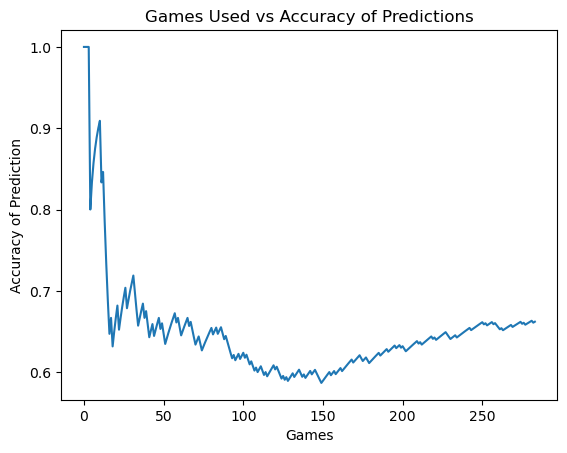

In [131]:
# Accuracy of model throughout 2022 Season
acc = []
for i in range(1, len(df_2022['correct_prediction']) + 1):
    val = df_2022['correct_prediction'][:i].value_counts()[1]/(i)
    acc.append(val)

plt.plot(range(284), acc)
plt.title('Games Used vs Accuracy of Predictions')
plt.xlabel('Games')
plt.ylabel('Accuracy of Prediction')

<AxesSubplot:xlabel='correct_prediction', ylabel='win_probability'>

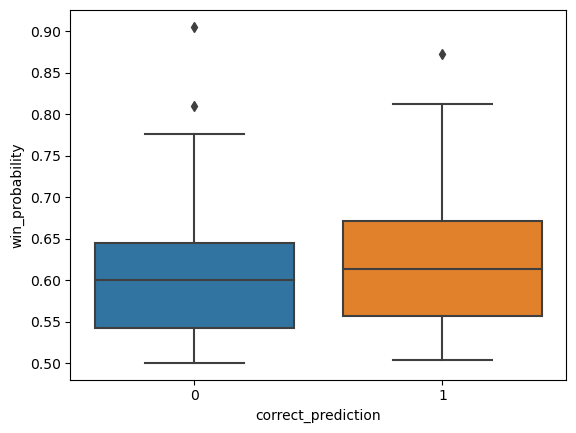

In [132]:
sns.boxplot(y = 'win_probability', x  = 'correct_prediction', data = df_2022)


Text(0, 0.5, 'Probability')

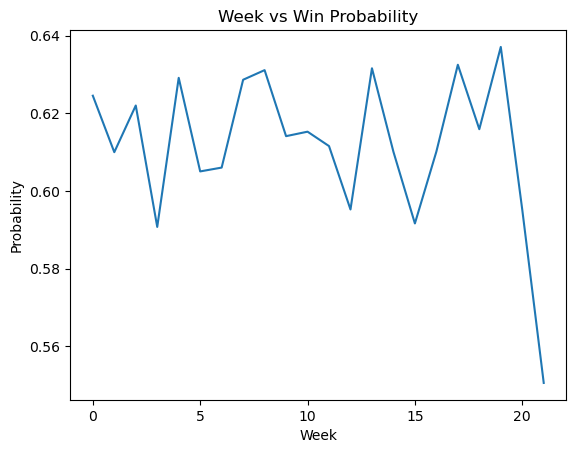

In [133]:
# Chance of winning by week
plt.plot(range(df_2022['week'].nunique()), df_2022.groupby('week')['win_probability'].mean())
plt.title('Week vs Win Probability')
plt.xlabel('Week')
plt.ylabel('Probability')